In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import math

In [2]:
df = pd.read_csv('../2.Feature Engineering/new data/modelling_set.csv')
df.describe()

,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
count,2.184150e+05,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,...,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.0,218415.000000,147473.000000,218415.000000
mean,4.993458e+07,6.471827,3.829439,2.181860,2.918800,1.655033,0.578166,10.387318,2.193531,0.962237,...,0.001699,0.015457,47.750155,0.363524,0.448078,0.188398,0.0,0.054863,0.452951,0.675196
std,2.892479e+07,7.734678,3.440373,2.507408,2.676663,1.906704,1.683426,15.721582,2.271990,1.057978,...,0.047286,0.262061,23.238375,0.481015,0.497298,0.391031,0.0,0.227714,1.573818,0.468303
min,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.478774e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4.993677e+07,4.000000,4.000000,1.000000,2.666667,1.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,7.515525e+07,10.000000,7.000000,3.000000,5.000000,2.000000,1.527525,14.000000,4.000000,1.000000,...,0.000000,0.000000,65.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,9.999882e+07,111.000000,10.000000,10.000000,10.000000,12.000000,6.363961,84.000000,7.000000,7.000000,...,4.000000,23.000000,80.000000,1.000000,1.000000,1.000000,0.0,1.000000,15.000000,1.000000


In [3]:
df.loc[df['TARGET']>0,'TARGET'] = 1

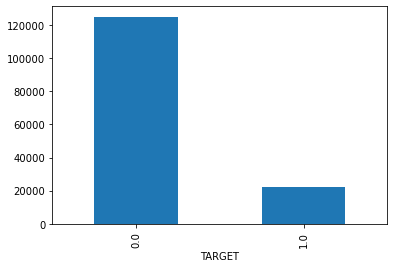

In [4]:
df.groupby(['TARGET']).size().plot.bar()

In [5]:
df_train = df[df['trainset']==1]

In [6]:
#Count missing data
def count_missing(df):   
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))
    return missing_data

count_missing(df_train)

                                         Total  Percent
trainset                                     0      0.0
PlaceSvc_Count_Unknown                       0      0.0
Specialty_Count_Surgery                      0      0.0
CharlsonIndex_range                          0      0.0
DSFS_range                                   0      0.0
no_PrimaryConditionGroup_PlaceSvc            0      0.0
no_ProcedureGroup_PrimaryConditionGroup      0      0.0
no_ProcedureGroup_Specialty                  0      0.0
no_PrimaryConditionGroup_Specialty           0      0.0
CharlsonIndex_std                            0      0.0
CharlsonIndex_ave                            0      0.0
CharlsonIndex_min                            0      0.0
CharlsonIndex_max                            0      0.0
CharlsonIndex_sum                            0      0.0
DSFS_std                                     0      0.0
DSFS_ave                                     0      0.0
DSFS_min                                     0  

,Total,Percent
trainset,0,0.0
PlaceSvc_Count_Unknown,0,0.0
Specialty_Count_Surgery,0,0.0
CharlsonIndex_range,0,0.0
DSFS_range,0,0.0
...,...,...
PrimaryConditionGroup_Count_CANCRB,0,0.0
PrimaryConditionGroup_Count_SKNAUT,0,0.0
PrimaryConditionGroup_Count_HIPFX,0,0.0
PrimaryConditionGroup_Count_GIBLEED,0,0.0


In [7]:
df_target = df[df['trainset']==0]

In [8]:
m = (df_train.columns != 'TARGET') & (df_train.columns != 'MemberID') & (df_train.columns != 'Year') & (df_train.columns != 'trainset')
X = df_train.loc[:, m]
y = df_train['TARGET']
y.describe()

count    147473.000000
mean          0.152557
std           0.359561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X = scaler.transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
def eval(model, X_test, y_test):
    y_pred = model.predict(X_test) # your predicted y values
    y_pred_int64 = y_pred.round(0).astype(int)
    # The root mean square logarithmic error
    msle = np.mean((np.log(y_pred_int64 + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    
    print ("RMSLE: %.4f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(y_pred, y_test)
    print ("R2 value: %.4f" % r2)
    return rmsle, r2

In [12]:
import itertools
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve

def draw_confusion_matrix(y_real, y_predict):
    conf = metrics.confusion_matrix(y_real, y_predict)

    classes = [0, 1]
    # plot confusion matrix
    plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = conf.max() / 2.
    for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
        plt.text(j, i, format(conf[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return conf
def performance(TP,FP,FN,TN): 
    # Accuracy 
    results = {}
    metric = "ACC"
    results[metric] = (TP + TN) / (TP + TN + FP + FN)
    print(f"{metric} is {results[metric]: .3f}")
    
    # Precision
    metric = "pecision"
    results[metric] = TP / (TP + FP)
    print(f"{metric} is {results[metric]: .3f}")
    
    # Recall or True Positive rate (TPR)
    metric = "recall"
    results[metric] = TP / (TP + FN)
    print(f"{metric} is {results[metric]: .3f}")
    
    #F1
    metric = "F1"
    results[metric] = 2 / (1 / results["pecision"] + 1 / results["recall"])
    print(f"{metric} is {results[metric]: .3f}")
    
    #False Positive Rate 
    metric = "FPR"
    results[metric] = FP / (FP + TN)
    print(f"{metric} is {results[metric]: .3f}")
    
    #False Negative Rate 
    metric = "FNR"
    results[metric] = FN / (FN + TP) 
    print(f"{metric} is {results[metric]: .3f}")
    
    return results

In [13]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = np.array(class_weights).tolist()
d = {}

for idx,item in enumerate(class_weights):
    d[idx] = item
d

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0. 1.], y=81145     0.0
86502     0.0
116087    0.0
103389    0.0
95922     1.0
         ... 
212773    0.0
167688    0.0
23994     0.0
37901     0.0
21295     0.0
Name: TARGET, Length: 103231, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 0.5899318810432715, 1: 3.279881807205948}

In [14]:
hyper_para = {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
model = linear_model.LogisticRegression(n_jobs=-1, verbose=1, **hyper_para)
model.fit(X_train, y_train)
#eval(model, X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 16 epochs took 3 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished


LogisticRegression(C=0.001, n_jobs=-1, penalty='l1', solver='saga', verbose=1)

In [15]:
eval(model, X_test, y_test)

RMSLE: 0.2710
R2 value: 0.0000


(0.27096522195643336, 0.0)

In [16]:
# Predicting y and probabilities for the train set
y_train_pred = model.predict(X_train)
# Probabilities will be given for 0 and 1; we only need those for the positive class (1) to calculate AUC 
y_train_probs = model.predict_proba(X_train)[:, 1]

# Predicting y and probabilities for the test set
y_test_pred = model.predict(X_test)
# Probabilities
y_test_probs = model.predict_proba(X_test)[:, 1]

---for training set:
Confusion Matrix: TP: 0,FP: 0,FN: 15737,TN: 87494
ACC is  0.848
pecision is  nan
recall is  0.000
F1 is  nan
FPR is  0.000
FNR is  1.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculated and Actual Accuracy:                           0.848,  0.848
Calculated and Actual Precision score:                    nan,  0.000
Calculated and Actual Recall score:                       0.000,  0.000
Calculated and Actual F1 score:                           nan,  0.000
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     87494
         1.0       0.00      0.00      0.00     15737

    accuracy                           0.85    103231
   macro avg       0.42      0.50      0.46    103231
weighted avg       0.72      0.85      0.78    103231

AUC training set =  0.670


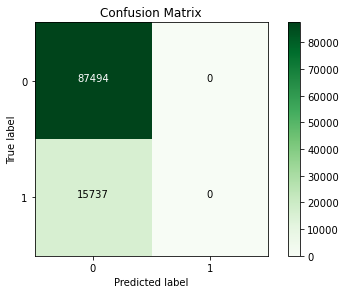

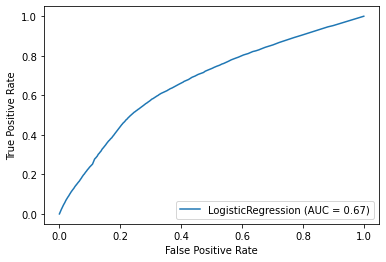

In [18]:
#Training score
print('---for training set:')
draw_confusion_matrix(y_train, y_train_pred)
TN,FP,FN,TP = metrics.confusion_matrix(y_train, y_train_pred).ravel()
print(f"Confusion Matrix: TP: {TP},FP: {FP},FN: {FN},TN: {TN}")

P1 = performance(TP,FP,FN,TN)
print(f"Calculated and Actual Accuracy:                          {P1['ACC']: .3f}, {metrics.accuracy_score(y_train, y_train_pred): .3f}")
print(f"Calculated and Actual Precision score:                   {P1['pecision']: .3f}, {metrics.precision_score(y_train, y_train_pred): .3f}")
print(f"Calculated and Actual Recall score:                      {P1['recall']: .3f}, {metrics.recall_score(y_train, y_train_pred): .3f}")
print(f"Calculated and Actual F1 score:                          {P1['F1']: .3f}, {metrics.f1_score(y_train, y_train_pred): .3f}")
print(classification_report(y_train, y_train_pred))

auc_score1 = metrics.roc_auc_score(y_train, y_train_probs)
print(f"AUC training set = {auc_score1: .3f}")

metrics.plot_roc_curve(model, X_train, y_train)
plt.show() 

---for testing set:
Confusion Matrix: TP: 0,FP: 0,FN: 6761,TN: 37481
ACC is  0.847
pecision is  nan
recall is  0.000
F1 is  nan
FPR is  0.000
FNR is  1.000
Calculated and Actual Accuracy:                           0.847,  0.848
Calculated and Actual Precision score:                    nan,  0.000
Calculated and Actual Recall score:                       0.000,  0.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculated and Actual F1 score:                           nan,  0.000
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     37481
         1.0       0.00      0.00      0.00      6761

    accuracy                           0.85     44242
   macro avg       0.42      0.50      0.46     44242
weighted avg       0.72      0.85      0.78     44242

AUC of testing set =  0.670


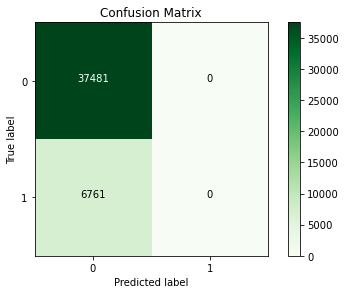

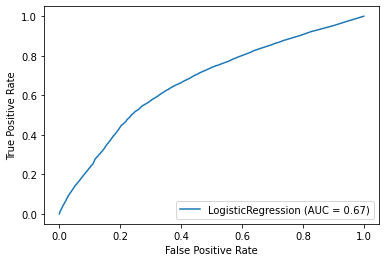

In [19]:
print('---for testing set:')
draw_confusion_matrix(y_test, y_test_pred)
TN,FP,FN,TP = metrics.confusion_matrix(y_test, y_test_pred).ravel()
print(f"Confusion Matrix: TP: {TP},FP: {FP},FN: {FN},TN: {TN}")

P2 = performance(TP,FP,FN,TN)
print(f"Calculated and Actual Accuracy:                          {P2['ACC']: .3f}, {metrics.accuracy_score(y_train, y_train_pred): .3f}")
print(f"Calculated and Actual Precision score:                   {P2['pecision']: .3f}, {metrics.precision_score(y_train, y_train_pred): .3f}")
print(f"Calculated and Actual Recall score:                      {P2['recall']: .3f}, {metrics.recall_score(y_train, y_train_pred): .3f}")
print(f"Calculated and Actual F1 score:                          {P2['F1']: .3f}, {metrics.f1_score(y_train, y_train_pred): .3f}")

print(classification_report(y_test, y_test_pred))

y_score = model.decision_function(X_test)
auc_score2 = metrics.roc_auc_score(y_test, y_test_probs)
print(f"AUC of testing set = {auc_score2: .3f}")

metrics.plot_roc_curve(model, X_test, y_test)
plt.show() 

In [21]:
param_grid = {
                'C': [0.001, 0.01, 0.1, 0.75, 1.0, 10],
                'penalty':['l1','l2'],
                'solver': ['saga', 'liblinear'],
             }


from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, cv=5)


In [22]:
grid_clf.fit(X_train, y_train)
eval(grid_clf, X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.3s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.3s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.0s finished
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 18 epochs took 2 seconds
RMSLE: 0.2708
R2 value: -11.3203


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


(0.270784812319447, -11.32031975207748)

In [23]:
grid_clf.best_params_, grid_clf.best_estimator_

({'C': 0.1, 'penalty': 'l2', 'solver': 'saga'},
 LogisticRegression(C=0.1, n_jobs=-1, solver='saga', verbose=1))

In [24]:
# Calculate the prediction in test set
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve
y_pred = grid_clf.predict(X_test)
y_proba = grid_clf.predict_proba(X_test)
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))
# Print the metrics on test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     37481
         1.0       0.51      0.04      0.08      6761

    accuracy                           0.85     44242
   macro avg       0.68      0.52      0.50     44242
weighted avg       0.80      0.85      0.79     44242



In [25]:
eval(grid_clf, X_test, y_test)

RMSLE: 0.2708
R2 value: -11.3203


(0.270784812319447, -11.32031975207748)

In [26]:
model.fit(X_train, y_train)
eval(model, X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 17 epochs took 3 seconds
RMSLE: 0.2710
R2 value: 0.0000


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


(0.27096522195643336, 0.0)

In [27]:
y_score = grid_clf.decision_function(X_test)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC = {auc_score}")

AUC = 0.6986855137500797


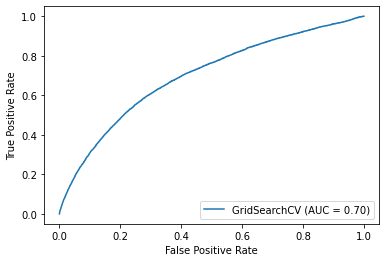

In [28]:
plot_roc_curve(grid_clf, X_test, y_test)

In [29]:
m = (df_target.columns != 'TARGET') & (df_target.columns != 'MemberID') & (df_target.columns != 'Year') & (df_target.columns != 'trainset')
X_submit = df_target.loc[:, m]
y_submit = df_target['TARGET']
y_submit.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TARGET, dtype: float64

In [30]:
X_submit_scl = scaler.transform(X_submit)

In [31]:
ylogic_pred_submit = grid_clf.predict(X_submit_scl)

submission = pd.DataFrame()
submission['MemberID'] = df_target['MemberID']

#ylogic_pred_submit = yridge_pred_submit.clip(min=0)
#ylogic_pred_submit = yridge_pred_submit.clip(max=15)
#pred_y = pred_y.astype(int)

submission['DIH'] = ylogic_pred_submit
submission.groupby(['DIH']).size()
submission.to_csv('../4.Evaluation/logistic.csv',index=False)

In [32]:
ylogic_pred_submit

array([0., 0., 0., ..., 0., 0., 0.])